In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
import pandas as pd
import numpy as np

In [3]:
ham_spam_df = pd.read_csv("ham-spam.csv")

#used to make sure that the data is properly loaded. 
ham_spam_df.head()

,IsSpam,Text
0,0,key issues going forwarda year end reviews rep...
1,0,congrats contratulations the execution the cen...
2,0,key issues going forwardall under control set...
3,0,epmi files protest entergy transcoattached our...
4,0,california power please contact kristin walsh ...


In [4]:
#finding out how many rows the dataset contains and confirm that there are no missing values.
ham_spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IsSpam  1000 non-null   int64 
 1   Text    1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
#removing duplicate rows from the dataset and check for balance
ham_spam_df = ham_spam_df.drop_duplicates()
ham_spam_df.groupby('IsSpam').describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        499    499  key issues going forwarda year end reviews rep...    1
1        500    500  take the reinsbecomeyour employer substantial ...    1

In [6]:
len(ham_spam_df)

999

In [7]:
#tokenizing the email text
from tensorflow.keras.preprocessing.text import Tokenizer

emails = ham_spam_df['Text'].values
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(emails)
sequences = tokenizer.texts_to_sequences(emails)

print(sequences[0])


[604, 144, 166, 5753, 123, 203, 1277, 141, 459, 1527, 55, 817, 123, 4422, 67, 504, 380, 167, 1890, 134, 121, 113, 31, 135, 397, 3, 1, 5754, 144, 855, 134, 121, 381, 1000, 144, 1891, 2221, 953, 2222]


In [8]:
len(sequences)

999

In [9]:
#a dictionary that maps integer values to words
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

def sequence_to_text(sequence):
    """Decode a sequence back to its original text."""
    return ' '.join([reverse_word_map.get(i, '?') for i in sequence])

#decoding the sqeuence back to text
decoded_texts = [sequence_to_text(seq) for seq in sequences]

comparison_df = pd.DataFrame({
    'Original_Text': ham_spam_df['Text'],
    'Decoded_Text': decoded_texts
})

comparison_df.head(10)


,Original_Text,Decoded_Text
0,key issues going forwarda year end reviews rep...,key issues going forwarda year end reviews rep...
1,congrats contratulations the execution the cen...,congrats contratulations the execution the cen...
2,key issues going forwardall under control set...,key issues going forwardall under control set ...
3,epmi files protest entergy transcoattached our...,epmi files protest entergy transcoattached our...
4,california power please contact kristin walsh ...,california power please contact kristin walsh ...
5,california power the following information fro...,california power the following information fro...
6,urg gas securitization agreementsfyi srs forwa...,urg gas securitization agreementsfyi srs forwa...
7,brazil commercial update version delete previ...,brazil commercial update version delete previo...
8,brazil commercial update version delete previo...,brazil commercial update version delete previo...
9,traveli will out the office this afternoon fri...,traveli will out the office this afternoon fri...


In [10]:
'''Encoding the integer sequences via multi-hot encoding'''

#dimensions should be equal to num_words of the tokenizer -> 100000
def vectorize_sequences(sequences, dimension=100000):
  #createing an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
          #sets specific indices of results[i] to 1s
            results[i, j] = 1.
    return results

In [11]:
import random
RANDOM_STATE = 15

random.seed(15)
np.random.seed(15)

In [12]:
from sklearn.model_selection import train_test_split

X = sequences
y = ham_spam_df['IsSpam'].values

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=RANDOM_STATE)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=True, random_state=RANDOM_STATE)

X_train = vectorize_sequences(X_train)
X_val = vectorize_sequences(X_val)
X_test = vectorize_sequences(X_test)

y_train = np.asarray(y_train).astype("float32")
y_val = np.asarray(y_val).astype("float32")
y_test = np.asarray(y_test).astype("float32")



In [13]:
model = keras.Sequential([
    layers.Dense(50, activation="relu"),
    layers.Dense(50, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [14]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [15]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=20,
                    validation_data=(X_val, y_val))

Epoch 1/20
20/20 [==============================] - 1s 23ms/step - loss: 0.4387 - accuracy: 0.9048 - val_loss: 0.2500 - val_accuracy: 0.9625
Epoch 2/20
20/20 [==============================] - 0s 12ms/step - loss: 0.1117 - accuracy: 0.9925 - val_loss: 0.1493 - val_accuracy: 0.9700
Epoch 3/20
20/20 [==============================] - 0s 11ms/step - loss: 0.0445 - accuracy: 0.9950 - val_loss: 0.1149 - val_accuracy: 0.9675
Epoch 4/20
20/20 [==============================] - 0s 11ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 0.0990 - val_accuracy: 0.9700
Epoch 5/20
20/20 [==============================] - 0s 11ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.0932 - val_accuracy: 0.9650
Epoch 6/20
20/20 [==============================] - 0s 11ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0924 - val_accuracy: 0.9625
Epoch 7/20
20/20 [==============================] - 0s 11ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1025 - val_accuracy: 0.9600
Epoch 8/20
20

In [ ]:
history_dict = history.history
history_dict.keys()

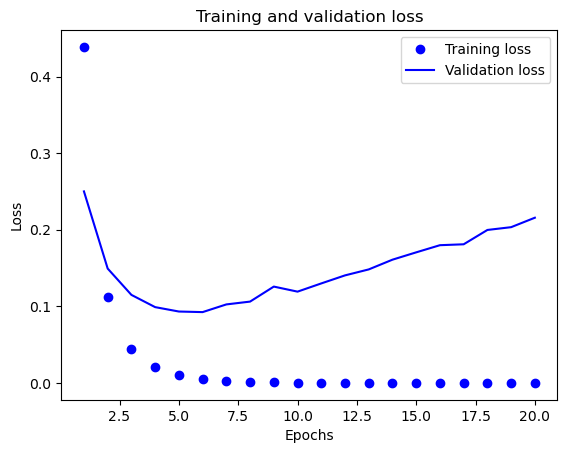

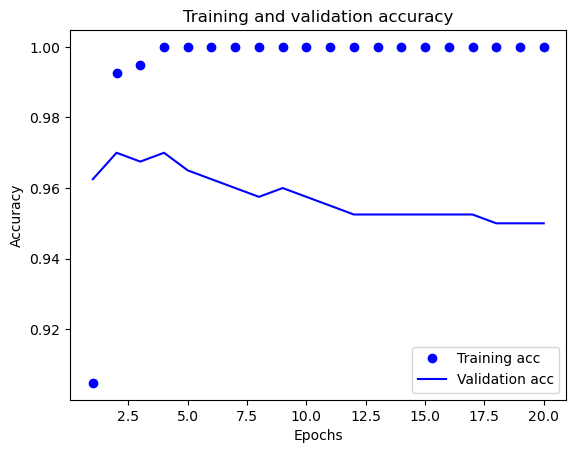

In [16]:
'''plotting the training and validation loss'''

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

#"bo" is for blue dot.
plt.plot(epochs, loss_values, "bo", label="Training loss")

#"b" is for solid blue line.
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


''' Plotting the training and validation accuracy'''

#Clears the figure
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [17]:
'''retraining a model from scratch'''

model = keras.Sequential([
    layers.Dense(50, activation="relu"),
    layers.Dense(50, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#limiting the epochs to 4
model.fit(X_train, y_train, epochs=3, batch_size=20)
results = model.evaluate(X_test, y_test)

Epoch 1/3
20/20 [==============================] - 0s 8ms/step - loss: 0.4378 - accuracy: 0.8647
Epoch 2/3
20/20 [==============================] - 0s 8ms/step - loss: 0.1173 - accuracy: 0.9950
Epoch 3/3
7/7 [==============================] - 0s 2ms/step - loss: 0.1056 - accuracy: 0.9750


In [18]:
results

[0.10563987493515015, 0.9750000238418579]

In [19]:
#the test accuracy of the model is approximately 97% accurate
#the test loss is about 1%

In [20]:
predictions = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [21]:
#predicted_labels = np.where(predictions >= 0.5, 1, 0).flatten()

#manually calculating test accuracy
predicted_labels = np.where(predictions >= 0.5, 1, 0).reshape(-1)
comparison_array = predicted_labels == y_test.astype(int)
accuracy = np.mean(comparison_array)
print(f"Accuracy: {accuracy*100}%")


Accuracy: 97.5%


In [22]:
#downloaded a new dataset from kaggle -> https://www.kaggle.com/datasets/venky73/spam-mails-dataset/

In [23]:
#spam_ham_dataset.csv is from kaggle and I used it to test on totally unseen emails
test_df = pd.read_csv("spam_ham_dataset.csv")

test_df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [29]:
test_df = test_df.drop_duplicates()
test_df.groupby('label_num').describe()

Unnamed: 0                                                         \
               count    mean          std     min      25%     50%      75%   
label_num                                                                     
0             3672.0  1835.5  1060.159422     0.0   917.75  1835.5  2753.25   
1             1499.0  4421.0   432.868340  3672.0  4046.50  4421.0  4795.50   

                   
              max  
label_num          
0          3671.0  
1          5170.0

In [30]:
len(test_df)

5171

In [31]:
test_sequences = tokenizer.texts_to_sequences(test_df['text'])

X_new_test = vectorize_sequences(test_sequences)

y_new_test = test_df['label_num'].values.astype("float32")


In [32]:
predicted_probabilities = model.predict(X_new_test)

162/162 [==============================] - 0s 2ms/step


In [33]:
#calculating accuracy
predicted_labels = np.where(predicted_probabilities >= 0.5, 1, 0).flatten()

correct_predictions = np.sum(predicted_labels == y_new_test)
accuracy = (correct_predictions / len(y_new_test)) * 100

print(f"Accuracy on the new test set: {accuracy}%")

Accuracy on the new test set: 93.03809707986849%


In [28]:
#the test accuracy is approximately 93% for totally unseen data which is great! 